In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0   # normalize
y_train, y_test = y_train.flatten(), y_test.flatten()
class_names = ['airplane','car','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.3100 - loss: 1.8571 - val_accuracy: 0.5609 - val_loss: 1.2299
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.5528 - loss: 1.2631 - val_accuracy: 0.6260 - val_loss: 1.0739
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6287 - loss: 1.0752 - val_accuracy: 0.6619 - val_loss: 0.9831
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6656 - loss: 0.9614 - val_accuracy: 0.6687 - val_loss: 0.9366
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.6973 - loss: 0.8787 - val_accuracy: 0.7065 - val_loss: 0.8613
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.7175 - loss: 0.8087 - val_accuracy: 0.7032 - val_loss: 0.8760
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7353 - loss: 0.7589 - val_accuracy: 0.7198 - val_loss: 0.8178
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7526 -

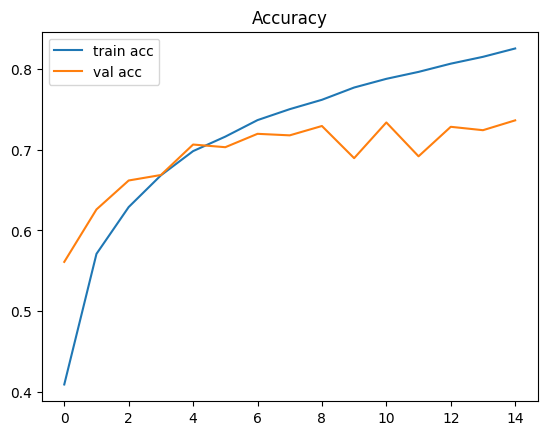

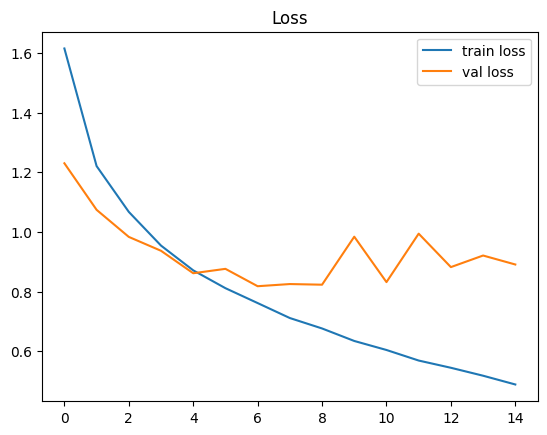

In [18]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title("Accuracy"); plt.show()


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title("Loss"); plt.show()

In [7]:
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.78      0.77      1000
         car       0.81      0.88      0.84      1000
        bird       0.69      0.58      0.63      1000
         cat       0.59      0.54      0.57      1000
        deer       0.63      0.73      0.68      1000
         dog       0.67      0.64      0.65      1000
        frog       0.81      0.76      0.78      1000
       horse       0.77      0.79      0.78      1000
        ship       0.83      0.84      0.83      1000
       truck       0.80      0.83      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000

Confusion Matrix:
 [[781  24  41  12  25   3   6   9  65  34]
 [ 20 877   5   4   3   2   7   1  15  66]
 [ 67   8 585  55 111  62  53  31  18  10]
 [ 26  15  58 542  87 125  63  46  19  19]
 [ 18  1

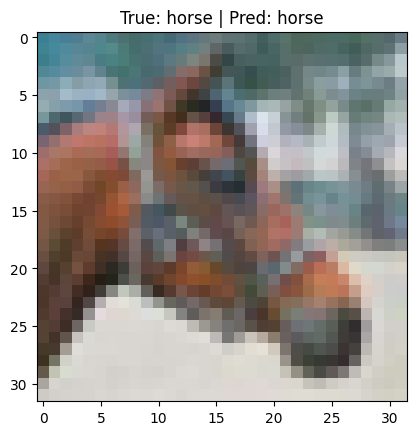

In [15]:
idx = 17
plt.imshow(x_test[idx])
plt.title("True: " + class_names[y_test[idx]] +
          " | Pred: " + class_names[y_pred[idx]])
plt.show()

In [19]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Overall accuracy: {accuracy:.4f}")

Overall accuracy: 0.7365
